In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('./Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


- Chọn cột dữ liệu theo mã sinh viên
- Đặng Thành Lợi: Cột 3,4,5


In [141]:

feats = ['3','4','5']


In [142]:
df[feats].head()

,3,4,5
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.0
4,1061.5,1061.5,1061.5


### 1. EDA dữ liệu

1.1. Kiểm tra dữ liệu thiếu

In [143]:
df[feats].isna().mean()

3    0.0
4    0.0
5    0.0
dtype: float64

- 2 cột đều không có dữ liệu thiếu

1.2. Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

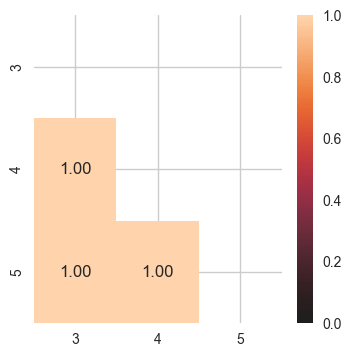

In [144]:
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f');

- Biểu đồ cho thấy 3 cột có độ tương quan dương và rất tương quan

1.3. Biểu đồ đường thể hiện dữ liệu qua thời gian

In [145]:
import plotly.express as px
fig = px.line(y=df['3'], x=df['Ngày'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 3",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

In [146]:
fig = px.line(y=df['4'], x=df['Ngày'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 4",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

In [147]:
fig = px.line(y=df['5'], x=df['Ngày'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 5",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

- Scale dữ liệu

In [148]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

- Dữ liệu sau khi scale

In [149]:
X[:5]

array([[-0.72216308, -0.72215304, -0.72216096],
       [-0.19550973, -0.19550131, -0.19550725],
       [-0.49359743, -0.49358809, -0.49359515],
       [-0.3640769 , -0.36406796, -0.36407453],
       [ 0.20257544,  0.20258265,  0.20257818]])

- Sử dụng phương pháp Elbow để xác định số cụm thông qua KMeans
- Chạy số cụm từ 3-12 xem số cụm nào có sự phân chia cụm có điểm số cao nhất

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

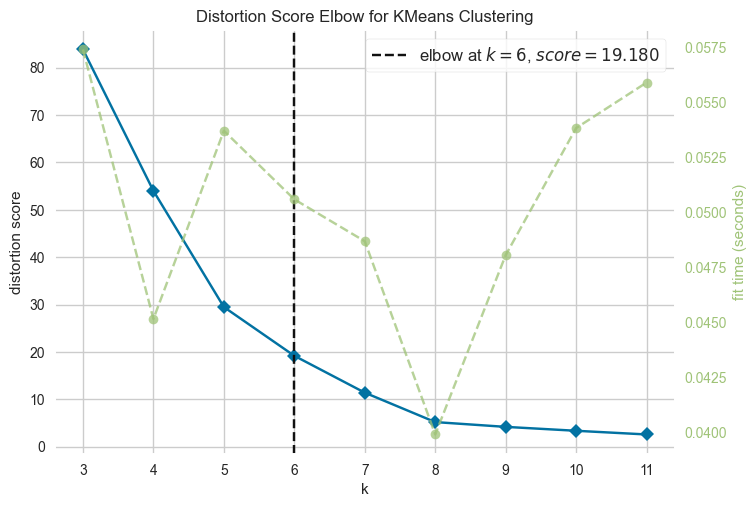

In [150]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

### 2. Sử dụng Bayesian Gaussian Mixture

#### Thử nghiệm với K = 6

In [151]:
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [152]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [153]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [154]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [155]:
labels=np.argmax(lgb_preds,axis=1)

- Nhãn của từng điểm dữ liệu sau khi training xong

In [156]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

- Có 4 nhãn tương ứng 4 cụm

C:\Users\PC\AppData\Local\Temp\ipykernel_10144\428648412.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



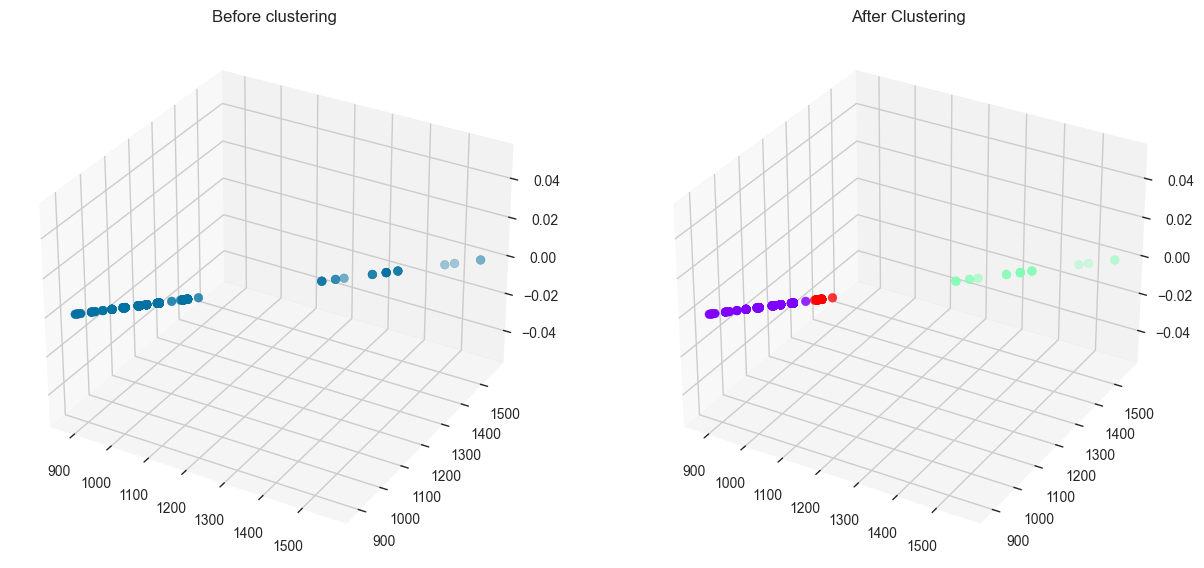

In [157]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

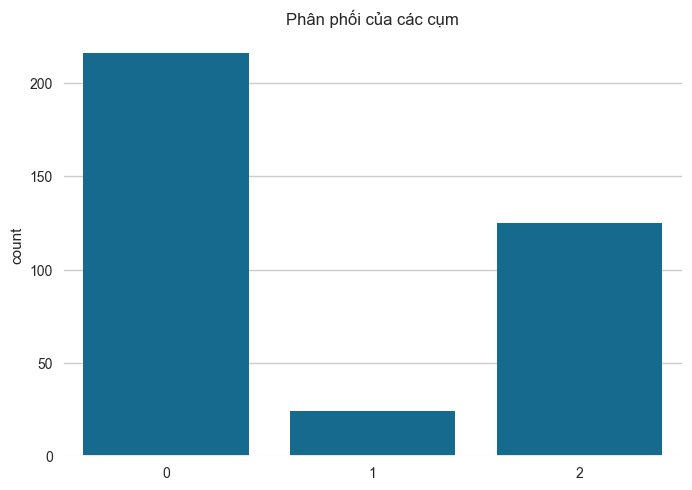

In [158]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ phân phối => các cụm được phân chia chưa đồng đều

#### Thử nghiệm với k=4

In [159]:
BGM = BayesianGaussianMixture(n_components=4,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [160]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(4)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(4):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [161]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00595087
[200]	valid_0's multi_logloss: 0.00296352
[400]	valid_0's multi_logloss: 0.00290952
[600]	valid_0's multi_logloss: 0.00287654
[800]	valid_0's multi_logloss: 0.00285444
[1000]	valid_0's multi_logloss: 0.00283862
[1200]	valid_0's multi_logloss: 0.00282676
[1400]	valid_0's multi_logloss: 0.00281754
[1600]	valid_0's multi_logloss: 0.00281018
[1800]	valid_0's multi_logloss: 0.00280416
[2000]	valid_0's multi_logloss: 0.00279916
[2200]	valid_0's multi_logloss: 0.00279493
[2400]	valid_0's multi_logloss: 0.00279131
[2600]	valid_0's multi_logloss: 0.00278818
[2800]	valid_0's multi_logloss: 0.00278544
[3000]	valid_0's multi_logloss: 0.00278303
[3200]	valid_0's multi_logloss: 0.00278089
[3400]	valid_0's multi_logloss: 0.00277898
[3600]	valid_0's multi_logloss: 0.00277726
[3800]	valid_0's multi_logloss: 0.0027757
[4000]	valid_0's multi_logloss: 0.00277429
[4200]	valid_0's multi_logloss: 0.002773
[4400]	valid_0's multi_logloss: 0.00277182
[4600]	valid_0's mu

In [162]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

- Nhãn sau khi phân loại có 3 nhãn

In [163]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\PC\AppData\Local\Temp\ipykernel_10144\3010113255.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



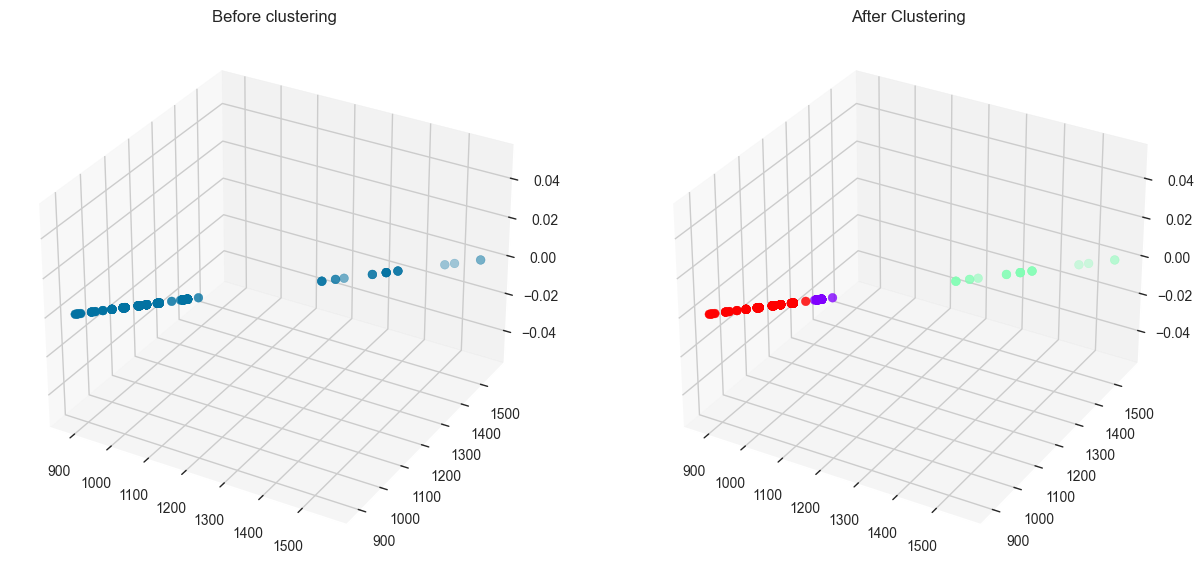

In [164]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

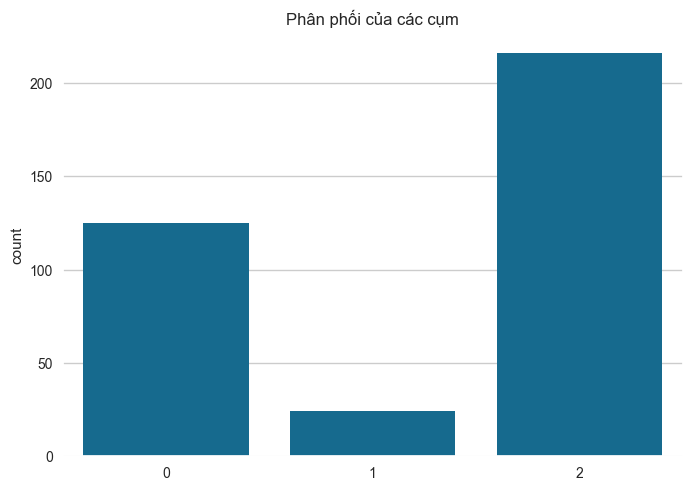

In [165]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ biểu đồ số cụm đã được phân chia đồng đều hơn

#### Thử nghiệm với K=3

In [166]:
BGM = BayesianGaussianMixture(n_components=3,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [167]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(3)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(3):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [168]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [169]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [170]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\PC\AppData\Local\Temp\ipykernel_10144\1574987084.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



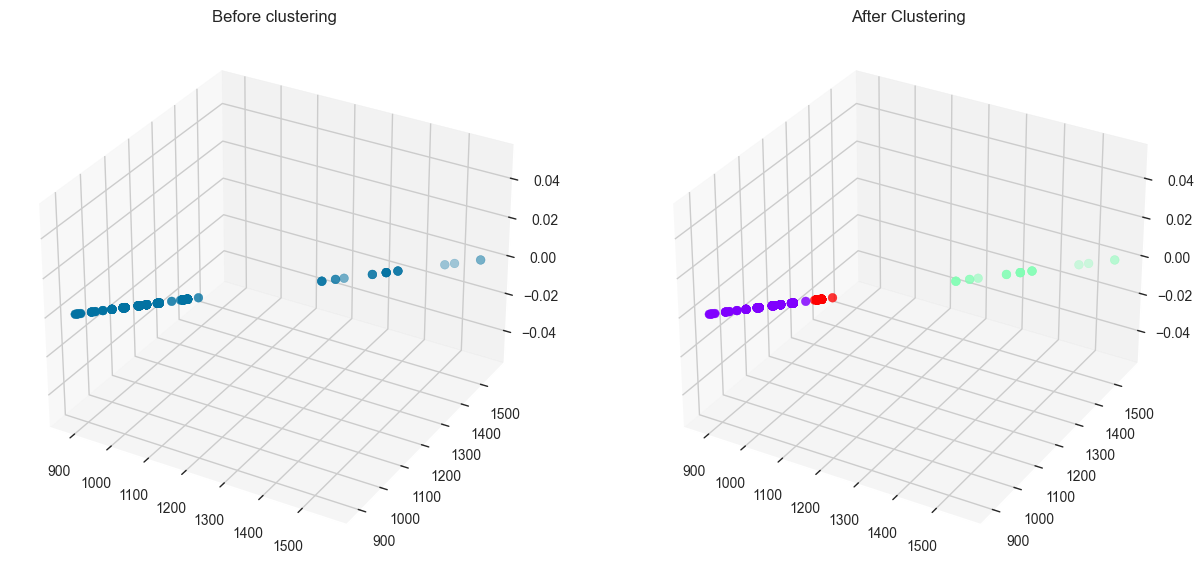

In [171]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['3'], df['4'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

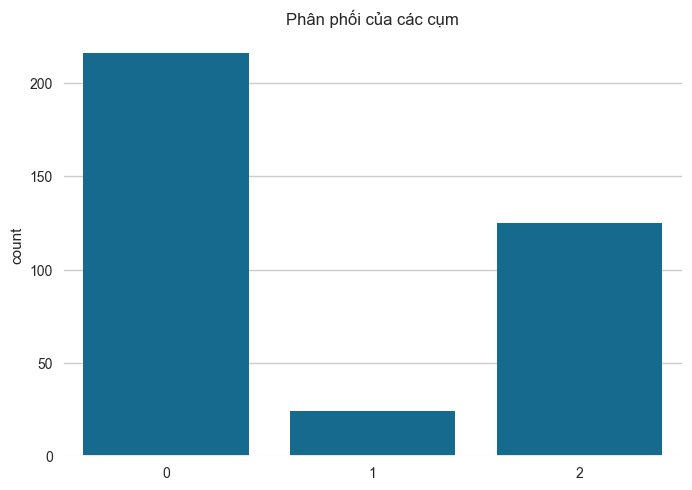

In [172]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

### 3. Sử dụng GRU để dự đoán giá trị tương lai

In [173]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import GRU

In [174]:
feats = ['Ngày', '3','4','5']

In [175]:
df = df[feats]

In [176]:
df

,Ngày,3,4,5
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


- Chuyển format ngày

In [177]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

- Tạo số dữ liệu test bằng tháng 12

In [178]:
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

Biểu đồ thể hiện training và test trước khi dự đoán

- Biểu đồ thể hiện toàn bộ dữ liệu

In [179]:
import plotly.express as px
fig = px.line(y=df['3'], x=df['Ngày'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="3",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

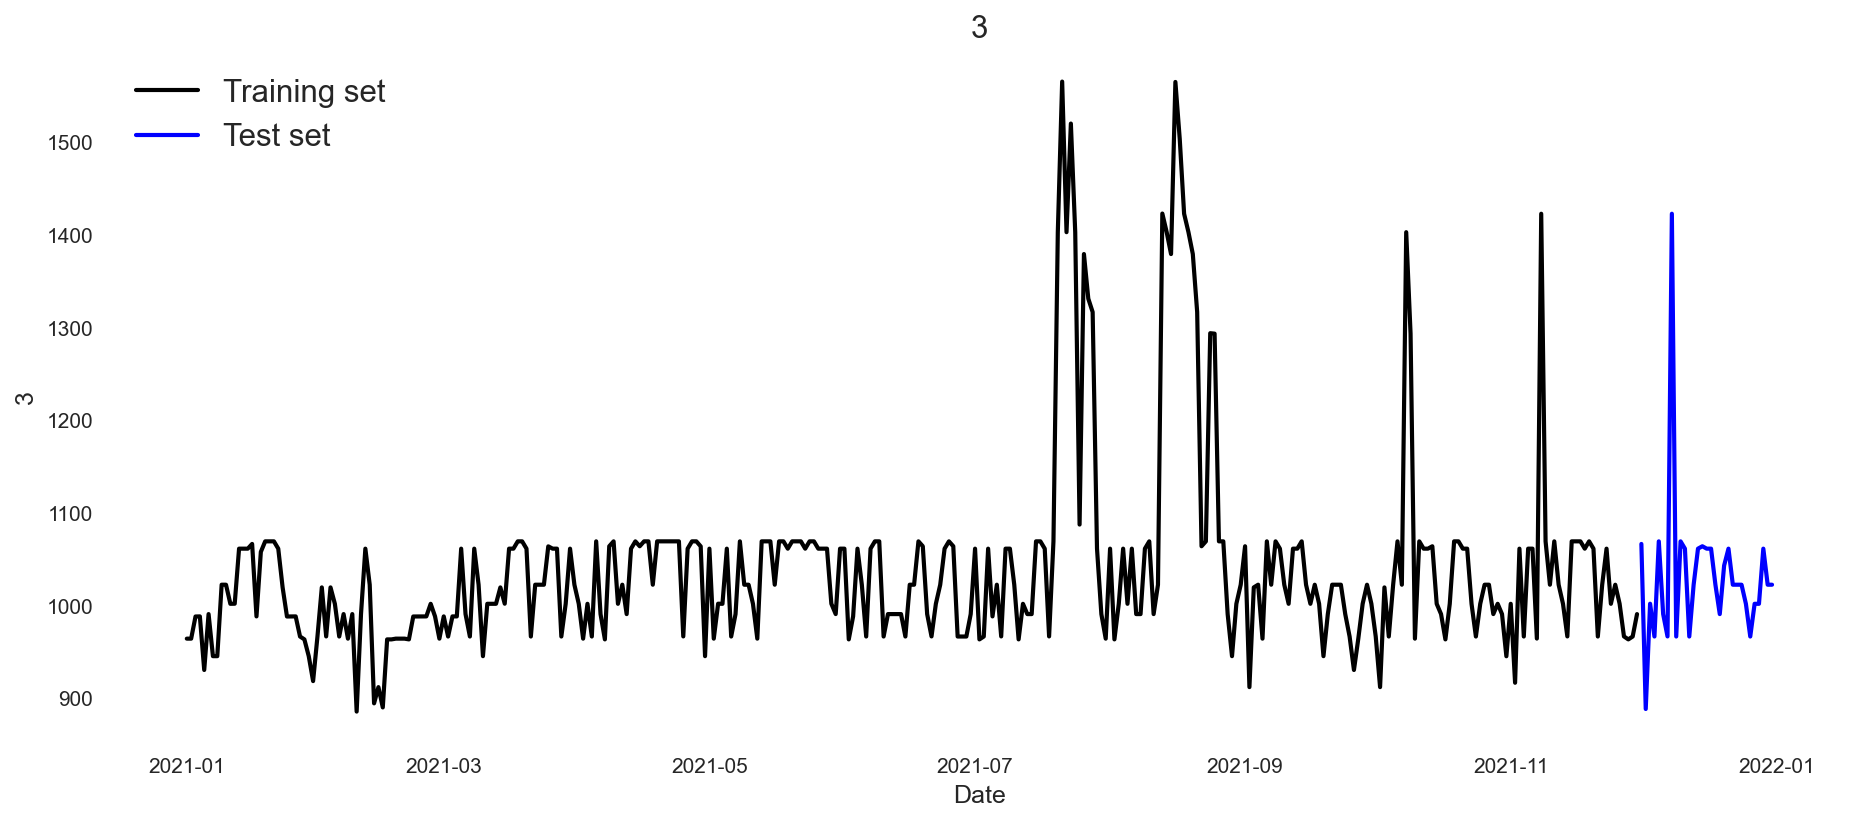

In [180]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['3'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['3'][-test_size:], color='blue', lw=2)
plt.title('3', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('3', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

- Sử dụng MinMaxScaler để đưa dữ liệu về khoảng 0-1

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['3','4','5']])

MinMaxScaler()

- Chọn window_size = 60 tức là 60 ngày dự đoán cho 1 ngày tiếp theo

In [182]:
window_size = 60

- Tạo tập training data

In [183]:
train_data = df[['3','4','5']][:-test_size]
train_data = scaler.transform(train_data)

In [184]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

- Tạo tập test data

In [219]:
test_data = df[['3','4','5']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [186]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

- Chuyển đổi dữ liệu từ dataframe, series sang numpy array

In [187]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [215]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [216]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (274, 60, 1)
y_train Shape:  (274, 1)
X_test Shape:   (31, 60, 1)
y_test Shape:   (31, 1)


- Khởi tạo model

In [220]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = GRU(units = 64, return_sequences=False)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

- Tạo bộ siêu tham số: epochs=40 (lặp 40 lần)

In [221]:
model = define_model()
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.1041 - val_loss: 0.0640
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0833 - val_loss: 0.0518
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0650 - val_loss: 0.0157
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0259 - val_loss: 0.0171
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0271 - val_loss: 0.0170
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0254 - val_loss: 0.0165
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0223 - val_loss: 0.0161
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0294 - val_loss: 0.0160
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0302 - val_loss: 0.0160
Epoch 10/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0288 - val_loss: 0.0162
Epoch 11/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0265 - val_loss: 0.0162
Epoch 12/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0277 - val_loss: 0.0162


- Dự đoán

In [222]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [223]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [224]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.017703939229249954
Test MAPE: 1.840315246528816


In [232]:
y_test_expanded = np.hstack((y_test, np.zeros((y_test.shape[0], 2))))
y_pred_expanded = np.hstack((y_pred, np.zeros((y_pred.shape[0], 2))))

y_test_true = scaler.inverse_transform(y_test_expanded)
y_test_pred = scaler.inverse_transform(y_pred_expanded)

- Vẽ biểu đồ sau khi đã tự đoán

ValueError: x and y must have same first dimension, but have shapes (73,) and (5,)

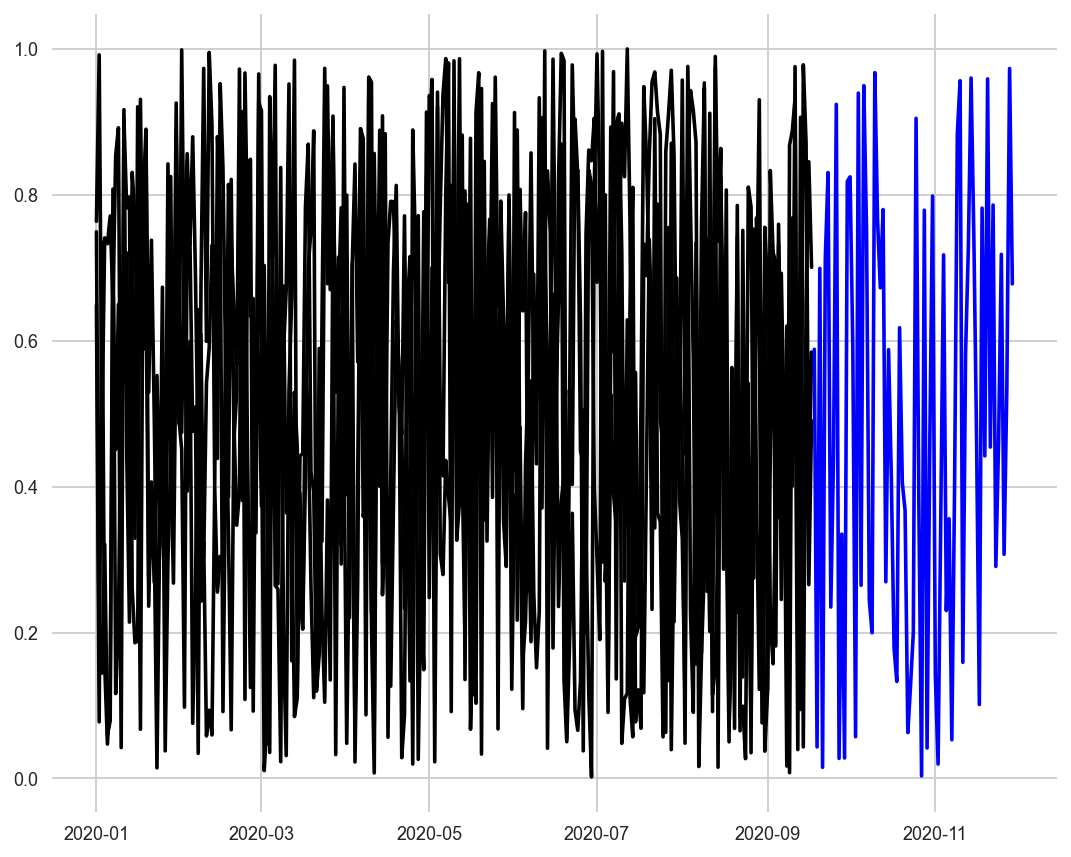

In [244]:
import matplotlib.pyplot as plt

# Sử dụng dữ liệu huấn luyện ban đầu
train_data_original = df[['3', '4', '5']].iloc[:-test_size]

# Thực hiện inverse_transform trên dữ liệu ban đầu
train_data_true = scaler.inverse_transform(train_data_original)


# Sử dụng cùng một phạm vi 'Ngày' cho cả dữ liệu thực tế và dự đoán
date_test = df['Ngày'].iloc[-test_size:]




# Tạo plot
plt.figure(figsize=(10, 8), dpi=130)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes', edgecolor='white')

# Vẽ dữ liệu training
plt.plot(date_train, train_data_true, color='black', lw=2)

# Sử dụng cùng một phạm vi 'Ngày' cho cả dữ liệu thực tế và dự đoán
date_test = df['Ngày'].iloc[-test_size:]

# Đảm bảo rằng kích thước của dự đoán khớp với kích thước của dữ liệu thực tế và 'Ngày'
y_test_pred = y_test_pred[:len(date_test)]

# Vẽ dữ liệu thực tế và dự đoán với phạm vi 'Ngày' đúng kích thước
plt.plot(date_test, y_test_true, color='blue', lw=2)
plt.plot(date_test, y_test_pred, color='red', lw=2)


# Thiết lập tiêu đề và nhãn
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


Kamal


In [203]:
data = df[['3','4', '5']]

In [204]:
test_size = 0.2 * data.shape[0]
test_size = int(test_size)
test_size

73

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=3)

kf = kf.em(data.values[:-test_size], n_iter=10)

state_means, state_covariances = kf.smooth(data.values[-test_size:])

In [206]:
state_means.shape

(73, 1)

In [207]:
data.values[-test_size:][:, 0]

array([1069.4, 1061.5, 1061.5, 1002. ,  966.7, 1002. , 1022.6, 1022.6,
        990.9, 1002. ,  990.9,  945.4, 1002. ,  916.8, 1061.5,  966.7,
       1061.5, 1061.5,  964.5, 1422.9, 1069.4, 1022.6, 1069.4, 1022.6,
       1002. ,  966.8, 1069.4, 1069.4, 1069.4, 1061.5, 1069.4, 1061.5,
        966.7, 1022.6, 1061.5, 1002. , 1022.6, 1002.1,  966.8,  963.6,
        966.7,  990.9, 1066.6,  888.5, 1002.1,  966.7, 1069.4,  990.9,
        966.8, 1422.9,  966.7, 1069.4, 1061.5,  966.7, 1022.6, 1061.5,
       1064.1, 1061.5, 1061.5, 1022.6,  990.9, 1043.3, 1061.5, 1022.6,
       1022.6, 1022.6, 1002. ,  966.7, 1002. , 1002. , 1061.5, 1022.6,
       1022.6])

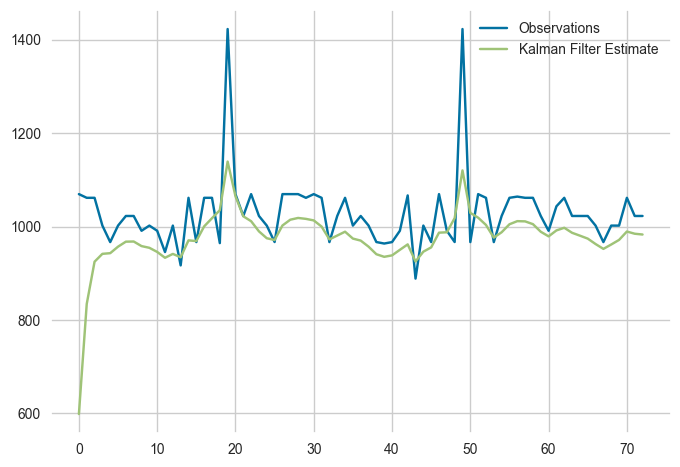

In [208]:
# Vẽ kết quả
plt.plot(data.values[-test_size:][:,0], label='Observations')
plt.plot(state_means, label='Kalman Filter Estimate')
plt.legend()
plt.show()